In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\LENOVO\Downloads\CLC_train.xlsx')

In [3]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
data.shape

(7485, 16)

In [5]:
data.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [6]:
data['CO_GT'].value_counts()

-200.0    1346
 1.6       275
 0.7       260
 1.7       258
 0.8       251
          ... 
 7.6         1
 9.4         1
 9.5         1
 10.1        1
 11.5        1
Name: CO_GT, Length: 88, dtype: int64

In [7]:
data['PT08_S1_CO'].value_counts()

-200     323
 1100     24
 938      22
 1124     21
 1111     21
        ... 
 1437      1
 769       1
 741       1
 717       1
 718       1
Name: PT08_S1_CO, Length: 1019, dtype: int64

In [8]:
data['NMHC_GT'].value_counts()

-200    6698
 66       11
 40        8
 29        7
 57        6
        ... 
 138       1
 146       1
 162       1
 170       1
 8         1
Name: NMHC_GT, Length: 420, dtype: int64

In [9]:
data['C6H6_GT'].value_counts()

-200.0    323
 3.0       57
 2.2       55
 2.5       54
 2.8       54
         ... 
 45.9       1
 33.2       1
 31.3       1
 31.7       1
 49.5       1
Name: C6H6_GT, Length: 401, dtype: int64

In [10]:
data['PT08_S2_NMHC'].value_counts()

-200     323
 985      20
 1012     20
 962      19
 853      18
        ... 
 1481      1
 1497      1
 1509      1
 1517      1
 1793      1
Name: PT08_S2_NMHC, Length: 1198, dtype: int64

In [11]:
data['Nox_GT'].value_counts()

-200     1318
 120       31
 122       30
 41        29
 104       28
         ... 
 949        1
 953        1
 1005       1
 1017       1
 4          1
Name: Nox_GT, Length: 917, dtype: int64

In [12]:
data['PT08_S3_Nox'].value_counts()

-200     323
 685      21
 846      21
 648      21
 876      20
        ... 
 1421      1
 1429      1
 1433      1
 1437      1
 2081      1
Name: PT08_S3_Nox, Length: 1129, dtype: int64

In [13]:
data['NO2_GT'].value_counts()

-200    1321
 119      66
 95       66
 114      64
 127      63
        ... 
 285       1
 291       1
 256       1
 309       1
 295       1
Name: NO2_GT, Length: 279, dtype: int64

In [14]:
data['PT08_S4_NO2'].value_counts()

-200     323
 1488     21
 1539     20
 1580     19
 1638     19
        ... 
 2204      1
 2216      1
 2228      1
 2232      1
 2047      1
Name: PT08_S4_NO2, Length: 1536, dtype: int64

In [15]:
data['PT08_S5_O3'].value_counts()

-200     323
 825      17
 1192     15
 826      15
 816      15
        ... 
 1853      1
 1889      1
 1893      1
 1905      1
 2069      1
Name: PT08_S5_O3, Length: 1687, dtype: int64

In [16]:
data['T'].value_counts()

-200.0    323
 20.8      49
 20.2      45
 21.3      44
 14.6      43
         ... 
 0.3        1
 40.7       1
-1.2        1
-0.5        1
 41.1       1
Name: T, Length: 430, dtype: int64

In [17]:
data['RH'].value_counts()

-200.0    323
 53.1      26
 57.9      26
 57.6      23
 47.6      23
         ... 
 13.2       1
 12.3       1
 12.2       1
 12.5       1
 9.8        1
Name: RH, Length: 746, dtype: int64

In [18]:
data['AH'].value_counts()

-200.0000    323
 0.9722        6
 0.8394        5
 0.7487        5
 0.9684        5
            ... 
 1.3515        1
 1.0119        1
 0.4245        1
 0.7696        1
 0.4417        1
Name: AH, Length: 5614, dtype: int64

In [19]:
data=data.drop(columns=['NMHC_GT'])

In [20]:
data=data.drop(data[data['AH']==-200].index)

In [21]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23,19:00:00,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23,20:00:00,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17,18:00:00,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23,18:00:00,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26,18:00:00,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [22]:
data['CO_GT'].value_counts()

-200.0    1313
 1.6       264
 0.7       252
 0.8       243
 0.9       241
          ... 
 9.4         1
 9.5         1
 10.1        1
 7.4         1
 11.5        1
Name: CO_GT, Length: 86, dtype: int64

In [23]:
data['PT08_S1_CO'].value_counts()

1100    24
938     22
1111    21
1124    21
1050    20
        ..
1437     1
769      1
741      1
717      1
718      1
Name: PT08_S1_CO, Length: 1018, dtype: int64

In [24]:
data['C6H6_GT'].value_counts()

3.0     57
2.2     55
2.8     54
2.5     54
10.9    54
        ..
30.5     1
35.5     1
43.0     1
63.7     1
49.5     1
Name: C6H6_GT, Length: 400, dtype: int64

In [25]:
data['PT08_S2_NMHC'].value_counts()

1012    20
985     20
962     19
853     18
914     18
        ..
1497     1
1509     1
1517     1
1525     1
444      1
Name: PT08_S2_NMHC, Length: 1197, dtype: int64

In [26]:
data['Nox_GT'].value_counts()

-200    1277
 122      29
 120      29
 93       28
 95       28
        ... 
 865       1
 877       1
 881       1
 897       1
 4         1
Name: Nox_GT, Length: 891, dtype: int64

In [27]:
data['PT08_S3_Nox'].value_counts()

846     21
648     21
685     21
765     20
733     20
        ..
1421     1
1429     1
1433     1
1437     1
2081     1
Name: PT08_S3_Nox, Length: 1128, dtype: int64

In [28]:
data['NO2_GT'].value_counts()

-200    1280
 95       64
 119      63
 114      63
 110      60
        ... 
 253       1
 237       1
 9         1
 5         1
 309       1
Name: NO2_GT, Length: 270, dtype: int64

In [29]:
data['PT08_S4_NO2'].value_counts()

1488    21
1539    20
1580    19
1638    19
1490    18
        ..
2307     1
2311     1
2319     1
2323     1
2047     1
Name: PT08_S4_NO2, Length: 1535, dtype: int64

In [30]:
data['PT08_S5_O3'].value_counts()

825     17
816     15
826     15
1192    15
799     14
        ..
1853     1
1889     1
1893     1
1905     1
2069     1
Name: PT08_S5_O3, Length: 1686, dtype: int64

In [31]:
data['T'].value_counts()

20.8    49
20.2    45
21.3    44
14.6    43
15.6    41
        ..
0.3      1
42.6     1
0.0      1
1.5      1
41.8     1
Name: T, Length: 429, dtype: int64

In [32]:
data['RH'].value_counts()

53.1    26
57.9    26
57.6    23
49.8    23
51.4    23
        ..
82.1     1
12.2     1
12.3     1
85.4     1
9.8      1
Name: RH, Length: 745, dtype: int64

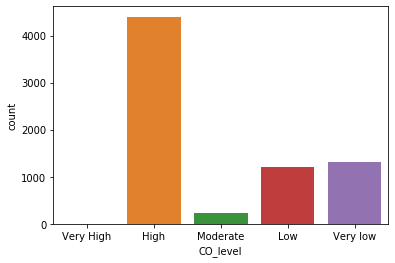

In [33]:
sns.countplot(x="CO_level", data=data)

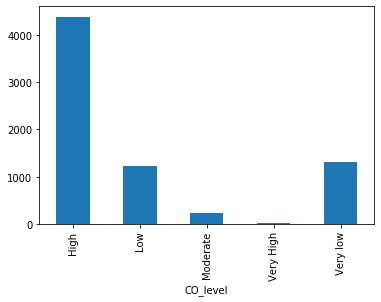

In [34]:
#fig = plt.figure(figsize=(8,6))
data.groupby('CO_level')["CO_GT"].count().plot.bar(ylim=0)
plt.show()

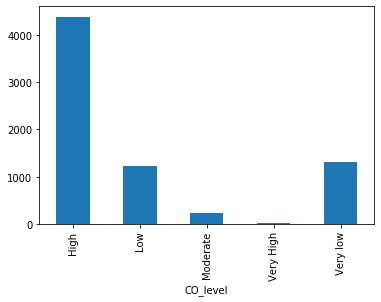

In [35]:
data.groupby('CO_level')["Nox_GT"].count().plot.bar(ylim=0)
plt.show()

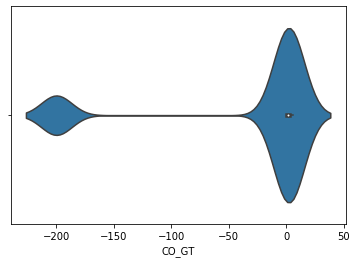

In [36]:
sns.violinplot(x=data["CO_GT"])

In [37]:
x=data['CO_GT']
x=x.drop(x[x==-200].index)
a=x.mean()
data['CO_GT']=data['CO_GT'].replace(to_replace=-200, value =a) 
data['CO_GT'].value_counts()

2.398957     1313
1.600000      264
0.700000      252
0.800000      243
0.900000      241
             ... 
9.400000        1
9.500000        1
10.100000       1
7.400000        1
11.500000       1
Name: CO_GT, Length: 86, dtype: int64

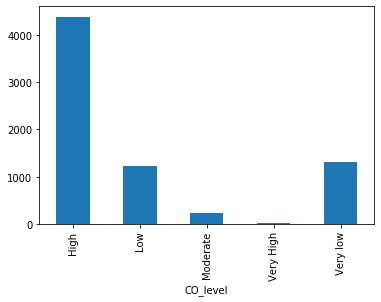

In [38]:
#fig = plt.figure(figsize=(8,6))
data.groupby('CO_level')["CO_GT"].count().plot.bar(ylim=0)
plt.show()

In [39]:
x=data['Nox_GT']
x=x.drop(x[x==-200].index)
a=x.mean()
data['Nox_GT']=data['Nox_GT'].replace(to_replace=-200, value =a) 
data['Nox_GT'].value_counts()

267.750892     1277
122.000000       29
120.000000       29
93.000000        28
95.000000        28
               ... 
1074.000000       1
1098.000000       1
719.000000        1
1188.000000       1
591.000000        1
Name: Nox_GT, Length: 891, dtype: int64

In [40]:
x=data['NO2_GT']
x=x.drop(x[x==-200].index)
a=x.mean()
data['NO2_GT']=data['NO2_GT'].replace(to_replace=-200, value =a) 
data['NO2_GT'].value_counts()

117.739034    1280
95.000000       64
119.000000      63
114.000000      63
116.000000      60
              ... 
252.000000       1
333.000000       1
322.000000       1
237.000000       1
295.000000       1
Name: NO2_GT, Length: 270, dtype: int64

In [41]:
data.head(10)

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,2004-11-23,19:00:00,11.9,2008,50.6,1980,1389.0,325,220.0,2562,2342,12.4,74.7,1.0741,Very High
1,2004-11-23,20:00:00,11.5,1918,49.4,1958,1358.0,335,190.0,2477,2237,11.5,76.2,1.0324,Very High
2,2004-11-17,18:00:00,10.2,1802,47.7,1924,748.0,356,192.0,2235,2452,13.7,52.8,0.8244,Very High
3,2004-11-23,18:00:00,10.2,1982,49.5,1959,1369.0,322,227.0,2536,2386,13.2,72.6,1.0936,Very High
4,2004-11-26,18:00:00,10.1,1956,45.2,1877,1389.0,347,255.0,2338,2465,15.5,62.8,1.0979,Very High
5,2004-12-13,18:00:00,9.9,1881,50.8,1983,1479.0,334,269.0,2271,2523,12.6,55.9,0.8142,Very High
6,2004-10-26,18:00:00,9.5,1908,52.1,2007,952.0,325,180.0,2775,2372,22.5,61.5,1.6579,Very High
7,2004-12-02,19:00:00,9.4,1816,43.9,1851,1184.0,341,171.0,2405,2069,15.4,73.0,1.2688,Very High
9,2004-11-04,18:00:00,8.7,1882,47.5,1920,1014.0,328,171.0,2609,2204,23.1,61.1,1.7082,High
10,2004-12-23,19:00:00,8.7,1704,36.1,1689,1070.0,402,242.0,1820,2480,7.1,50.3,0.5100,High


In [42]:
data.dtypes

Date            datetime64[ns]
Time                    object
CO_GT                  float64
PT08_S1_CO               int64
C6H6_GT                float64
PT08_S2_NMHC             int64
Nox_GT                 float64
PT08_S3_Nox              int64
NO2_GT                 float64
PT08_S4_NO2              int64
PT08_S5_O3               int64
T                      float64
RH                     float64
AH                     float64
CO_level                object
dtype: object

In [43]:
data['Date_year']=data['Date'].dt.year
data['Date_month'] = data['Date'].dt.month
data['Date_week'] = data['Date'].dt.week
data['Date_day'] = data['Date'].dt.day

In [44]:
data['Date'] = data['Date'].dt.date

In [45]:
data.dtypes

Date             object
Time             object
CO_GT           float64
PT08_S1_CO        int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT          float64
PT08_S3_Nox       int64
NO2_GT          float64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
Date_year         int64
Date_month        int64
Date_week         int64
Date_day          int64
dtype: object

In [46]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day
0,2004-11-23,19:00:00,11.9,2008,50.6,1980,1389.0,325,220.0,2562,2342,12.4,74.7,1.0741,Very High,2004,11,48,23
1,2004-11-23,20:00:00,11.5,1918,49.4,1958,1358.0,335,190.0,2477,2237,11.5,76.2,1.0324,Very High,2004,11,48,23
2,2004-11-17,18:00:00,10.2,1802,47.7,1924,748.0,356,192.0,2235,2452,13.7,52.8,0.8244,Very High,2004,11,47,17
3,2004-11-23,18:00:00,10.2,1982,49.5,1959,1369.0,322,227.0,2536,2386,13.2,72.6,1.0936,Very High,2004,11,48,23
4,2004-11-26,18:00:00,10.1,1956,45.2,1877,1389.0,347,255.0,2338,2465,15.5,62.8,1.0979,Very High,2004,11,48,26


In [47]:
data=data.drop(columns=['Date'])

In [48]:
data.shape

(7162, 18)

In [49]:
data['Time'].unique()

array([datetime.time(19, 0), datetime.time(20, 0), datetime.time(18, 0),
       datetime.time(17, 0), datetime.time(21, 0), datetime.time(9, 0),
       datetime.time(14, 0), datetime.time(8, 0), datetime.time(13, 0),
       datetime.time(16, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(15, 0), datetime.time(12, 0), datetime.time(0, 0),
       datetime.time(7, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(23, 0), datetime.time(3, 0), datetime.time(22, 0),
       datetime.time(6, 0), datetime.time(5, 0), datetime.time(4, 0)],
      dtype=object)

In [50]:
data['Split']=data['Time'].astype(str).str.split(':')

In [51]:
data.head()

,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Split
0,19:00:00,11.9,2008,50.6,1980,1389.0,325,220.0,2562,2342,12.4,74.7,1.0741,Very High,2004,11,48,23,"[19, 00, 00]"
1,20:00:00,11.5,1918,49.4,1958,1358.0,335,190.0,2477,2237,11.5,76.2,1.0324,Very High,2004,11,48,23,"[20, 00, 00]"
2,18:00:00,10.2,1802,47.7,1924,748.0,356,192.0,2235,2452,13.7,52.8,0.8244,Very High,2004,11,47,17,"[18, 00, 00]"
3,18:00:00,10.2,1982,49.5,1959,1369.0,322,227.0,2536,2386,13.2,72.6,1.0936,Very High,2004,11,48,23,"[18, 00, 00]"
4,18:00:00,10.1,1956,45.2,1877,1389.0,347,255.0,2338,2465,15.5,62.8,1.0979,Very High,2004,11,48,26,"[18, 00, 00]"


In [52]:
data['Time_hour']=data['Split'].map(lambda x:x[0].strip())

In [53]:
data.head()

,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Split,Time_hour
0,19:00:00,11.9,2008,50.6,1980,1389.0,325,220.0,2562,2342,12.4,74.7,1.0741,Very High,2004,11,48,23,"[19, 00, 00]",19
1,20:00:00,11.5,1918,49.4,1958,1358.0,335,190.0,2477,2237,11.5,76.2,1.0324,Very High,2004,11,48,23,"[20, 00, 00]",20
2,18:00:00,10.2,1802,47.7,1924,748.0,356,192.0,2235,2452,13.7,52.8,0.8244,Very High,2004,11,47,17,"[18, 00, 00]",18
3,18:00:00,10.2,1982,49.5,1959,1369.0,322,227.0,2536,2386,13.2,72.6,1.0936,Very High,2004,11,48,23,"[18, 00, 00]",18
4,18:00:00,10.1,1956,45.2,1877,1389.0,347,255.0,2338,2465,15.5,62.8,1.0979,Very High,2004,11,48,26,"[18, 00, 00]",18


In [54]:
data['Time_min']=data['Split'].map(lambda x:x[1].strip())

In [55]:
data['Time_sec']=data['Split'].map(lambda x:x[2].strip())

In [56]:
data=data.drop(columns=['Split'])

In [57]:
data.head()

,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,...,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Time_hour,Time_min,Time_sec
0,19:00:00,11.9,2008,50.6,1980,1389.0,325,220.0,2562,2342,...,74.7,1.0741,Very High,2004,11,48,23,19,00,00
1,20:00:00,11.5,1918,49.4,1958,1358.0,335,190.0,2477,2237,...,76.2,1.0324,Very High,2004,11,48,23,20,00,00
2,18:00:00,10.2,1802,47.7,1924,748.0,356,192.0,2235,2452,...,52.8,0.8244,Very High,2004,11,47,17,18,00,00
3,18:00:00,10.2,1982,49.5,1959,1369.0,322,227.0,2536,2386,...,72.6,1.0936,Very High,2004,11,48,23,18,00,00
4,18:00:00,10.1,1956,45.2,1877,1389.0,347,255.0,2338,2465,...,62.8,1.0979,Very High,2004,11,48,26,18,00,00


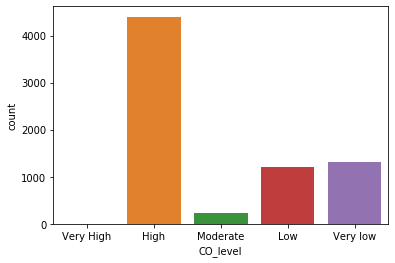

In [58]:
import seaborn as sns
sns.countplot(x="CO_level", data=data)

In [59]:
x=data['CO_level']
print(x)

0       Very High
1       Very High
2       Very High
3       Very High
4       Very High
          ...    
7480     Very low
7481     Very low
7482     Very low
7483     Very low
7484     Very low
Name: CO_level, Length: 7162, dtype: object


In [63]:
data['CO_level']=data['CO_level'].replace(to_replace='Very High', value ='High')
data['CO_level']=data['CO_level'].replace(to_replace='Moderate', value ='Low')
data['CO_level']=data['CO_level'].replace(to_replace='Very low', value ='Low')

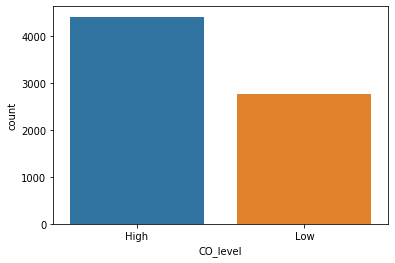

In [64]:
sns.countplot(x="CO_level", data=data)

In [65]:
data.dtypes

Time             object
CO_GT           float64
PT08_S1_CO        int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT          float64
PT08_S3_Nox       int64
NO2_GT          float64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
Date_year         int64
Date_month        int64
Date_week         int64
Date_day          int64
Time_hour        object
Time_min         object
Time_sec         object
dtype: object

In [66]:
data=data.drop(columns=['Time'])

In [67]:
data['Time_min'].unique()

array(['00'], dtype=object)

In [70]:
data=data.apply(pd.to_numeric,errors="ignore")
data.dtypes

CO_GT           float64
PT08_S1_CO        int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT          float64
PT08_S3_Nox       int64
NO2_GT          float64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
Date_year         int64
Date_month        int64
Date_week         int64
Date_day          int64
Time_hour         int64
Time_min          int64
Time_sec          int64
dtype: object

In [71]:
data=data.drop(columns=['Time_min','Time_sec'])

In [72]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
data['CO_level']=a.fit_transform(data['CO_level'])

In [73]:
data.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level,Date_year,Date_month,Date_week,Date_day,Time_hour
0,11.9,2008,50.6,1980,1389.0,325,220.0,2562,2342,12.4,74.7,1.0741,0,2004,11,48,23,19
1,11.5,1918,49.4,1958,1358.0,335,190.0,2477,2237,11.5,76.2,1.0324,0,2004,11,48,23,20
2,10.2,1802,47.7,1924,748.0,356,192.0,2235,2452,13.7,52.8,0.8244,0,2004,11,47,17,18
3,10.2,1982,49.5,1959,1369.0,322,227.0,2536,2386,13.2,72.6,1.0936,0,2004,11,48,23,18
4,10.1,1956,45.2,1877,1389.0,347,255.0,2338,2465,15.5,62.8,1.0979,0,2004,11,48,26,18


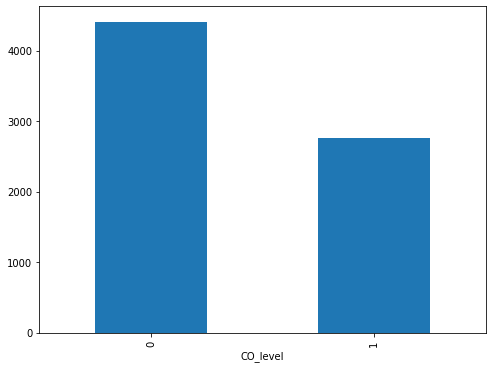

In [74]:
fig = plt.figure(figsize=(8,6))
data.groupby('CO_level')["CO_GT"].count().plot.bar(ylim=0)
plt.show()

In [75]:
data['CO_level'].unique()

array([0, 1], dtype=int64)

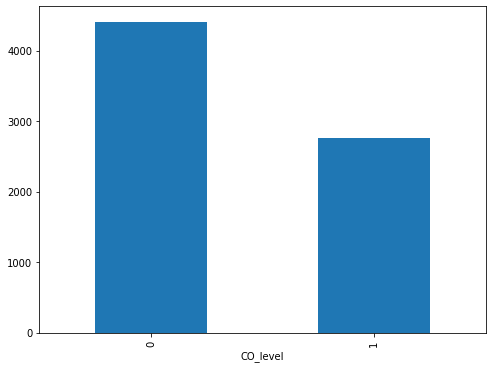

In [76]:
fig = plt.figure(figsize=(8,6))
data.groupby('CO_level')["C6H6_GT"].count().plot.bar(ylim=0)
plt.show()

In [77]:
data.columns

Index(['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'Nox_GT',
       'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'RH', 'AH',
       'CO_level', 'Date_year', 'Date_month', 'Date_week', 'Date_day',
       'Time_hour'],
      dtype='object')

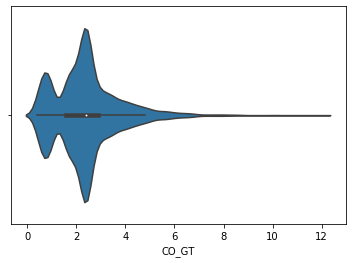

In [78]:
sns.violinplot(x=data["CO_GT"])

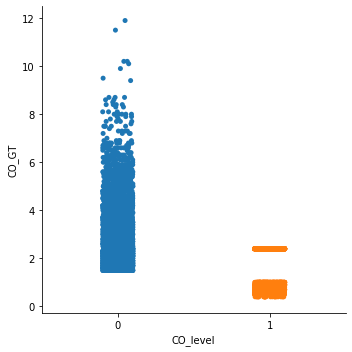

In [79]:
sns.catplot(x="CO_level",y="CO_GT",data=data)

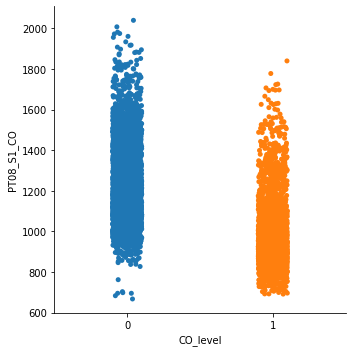

In [80]:
sns.catplot(x="CO_level",y="PT08_S1_CO",data=data)

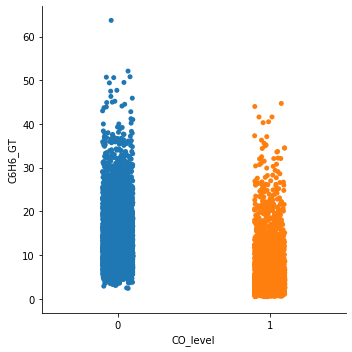

In [81]:
sns.catplot(x="CO_level",y="C6H6_GT",data=data)

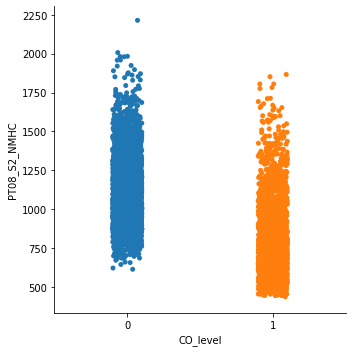

In [82]:
sns.catplot(x="CO_level",y="PT08_S2_NMHC",data=data)

In [83]:
train=data.drop(columns=['CO_level'])
test=data['CO_level']

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [87]:
model = DecisionTreeClassifier()
param = {'max_depth':[2,4,6,9,10,15],}
gsc = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'max_depth': 15}


In [88]:
y_pred = grid_result.best_estimator_.predict(x_test)
print(y_pred.shape)
print('Accuracy', accuracy_score(y_test, y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_test, y_pred))

(1433,)
Accuracy 0.7892533147243544
classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       863
           1       0.87      0.56      0.68       570

    accuracy                           0.79      1433
   macro avg       0.81      0.75      0.76      1433
weighted avg       0.80      0.79      0.78      1433

Confusion Matrix 
 [[814  49]
 [253 317]]


In [89]:
model = RandomForestClassifier()
param = {'n_estimators':[2,4,6,9,10,15,20],}
gsc = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'n_estimators': 20}


In [90]:
y_pred = grid_result.best_estimator_.predict(x_test)
print(y_pred.shape)
print('Accuracy', accuracy_score(y_test, y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_test, y_pred))

(1433,)
Accuracy 0.829030006978367
classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88       863
           1       1.00      0.57      0.73       570

    accuracy                           0.83      1433
   macro avg       0.89      0.79      0.80      1433
weighted avg       0.87      0.83      0.82      1433

Confusion Matrix 
 [[863   0]
 [245 325]]


In [91]:
model = SVC()
param = {'kernel':['rbf'], 'C':[1,5,10,15, 20], 'coef0':[0.001, 0.01,0.1, 0.5, 1]}
gsc = GridSearchCV(estimator=model,param_grid=param, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x_train, y_train)
print('Best Param', grid_result.best_params_)

Best Param {'C': 20, 'coef0': 0.001, 'kernel': 'rbf'}


In [92]:
y_pred = grid_result.best_estimator_.predict(x_test)
print(y_pred.shape)
print('Accuracy', accuracy_score(y_test, y_pred))
print("classification Report:\n",classification_report(y_test,y_pred))
print('Confusion Matrix \n' , confusion_matrix(y_test, y_pred))

(1433,)
Accuracy 0.9804605722260991
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       863
           1       0.98      0.97      0.98       570

    accuracy                           0.98      1433
   macro avg       0.98      0.98      0.98      1433
weighted avg       0.98      0.98      0.98      1433

Confusion Matrix 
 [[854   9]
 [ 19 551]]
